In [1]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import plotly.express as px


In [2]:
allfiles=["20210402_060000.WAV",
"20210402_061000.WAV",
"20210402_062000.WAV",
"20210402_063000.WAV",
"20210402_064000.WAV",
"20210402_065000.WAV"]

mypath="./data/"
# Méthode bourin je charge toutes les files et concatène les signaux
y = np.array([])
Nfft=1024 # Yaille de la fenètre de fft (Tstep = Nfft/Fs donne la résolution temporelle)
hop=int(Nfft/2) # step d'avancée de la fenêtre temporelle de la stft (regle l'overlap)
# charge les enregistrement, 1 minute toutes les 10 minutes
for file in allfiles:
    print(f"reading {file}")
    ytmp, Fs = librosa.load(mypath+file)
    y=np.concatenate([y,ytmp])


D = librosa.stft(y,hop_length=hop,n_fft=Nfft)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fn = np.arange(0, 1 + Nfft / 2) * Fs / Nfft # frequency vector
tn = np.arange(0,y.shape[0]/hop)*hop/Fs # time vector


reading 20210402_060000.WAV
reading 20210402_061000.WAV
reading 20210402_062000.WAV
reading 20210402_063000.WAV
reading 20210402_064000.WAV
reading 20210402_065000.WAV


In [3]:
'''fig = px.imshow(S_db, color_continuous_scale='viridis', origin='lower',
                        labels=dict(x="Time (sec)",
                                    y="Frequency (Hz)", color="Level (dB"),
                        x=tn,
                        y=fn,
                        zmin=0,
                        zmax=96,
                        aspect='auto',
                        title='Spectrogram')

fig.show()
'''

'fig = px.imshow(S_db, color_continuous_scale=\'viridis\', origin=\'lower\',\n                        labels=dict(x="Time (sec)",\n                                    y="Frequency (Hz)", color="Level (dB"),\n                        x=tn,\n                        y=fn,\n                        zmin=0,\n                        zmax=96,\n                        aspect=\'auto\',\n                        title=\'Spectrogram\')\n\nfig.show()\n'

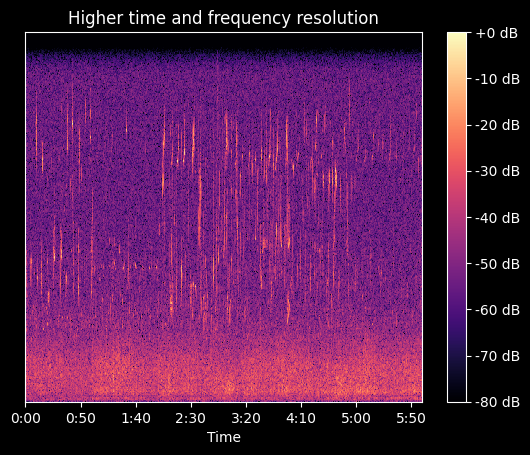

In [5]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, hop_length=hop, x_axis='time',
                               ax=ax)
ax.set(title='Spectrogram concatenated')
fig.colorbar(img, ax=ax, format="%+2.f dB")